<a href="https://colab.research.google.com/github/topdeveloppement/ai-nexus-one-machine-learning/blob/main/regression_lineaire_avancee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="position: relative; border-radius: 20px; overflow: hidden;">
    <img src="https://github.com/topdeveloppement/ai-nexus-one-machine-learning/blob/main/ml.jpeg?raw=true\" alt="Régression Avancée" style="width: 100%; height: auto; display: block;">
    <div style="position: absolute; top: 50%; left: 20px; transform: translateY(-50%); padding: 10px 20px; border-radius: 8px; font-size: 1.5em; color: white; font-weight: bold;">
        Approfondissement des Techniques de Régression Avancée
    </div>
</div>

<div style="padding: 20px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border-radius: 8px; margin: 15px auto;">
    <div style="display: flex; align-items: center;">
        <div style="flex: 0 0 auto; margin-right: 10px;">
            <img src="https://github.com/topdeveloppement.png" alt="Photo de l'auteur" style="border-radius: 4px; width: 100px; height: 100px; object-fit: cover;">
        </div>
        <div style="text-align: left;">
            <h3 style="margin: 4px 0; font-size: 1.5em;">Auteur : Omar Kennouche</h3>
            <p style="margin: 0;">Fonction : Chef de Projet Intelligence Artificielle et RPA</p>
            <p style="margin: 0;">Entreprise : AI Nexus One</p>
            <p style="margin: 0;">Contact : <a href="mailto:contact@topdeveloppement.tech" style="color: #0073e6; text-decoration: none;">contact@topdeveloppement.tech</a></p>
        </div>
    </div>
</div>

### Présentation d'AI Nexus One

**AI Nexus One** est un projet innovant de **formation** et de **développement de solutions en intelligence artificielle**, conçu pour accompagner les entreprises dans l’exploitation des technologies avancées afin d’**optimiser leurs opérations**, **innover**, et renforcer leur **compétitivité**.

### Structure d'AI Nexus One

AI Nexus One est structuré autour de trois branches principales :

- **Genesis** : modules de formation approfondis permettant aux entreprises de comprendre et maîtriser les concepts de l'IA.
- **Osiris** : assistant intelligent centralisé, conçu pour gérer des tâches complexes et optimiser les processus.
- **Flow** : orientée vers l'automatisation et la fluidification des processus métier.

### 🌐 Objectifs et Services

AI Nexus One propose :
- Une gamme complète de **modules de formation** sur des sujets comme le Machine Learning, la vision par ordinateur, et l’automatisation (RPA).
- Des solutions **sur mesure** adaptées aux besoins des entreprises.
- Un accompagnement pour faciliter l'**intégration pratique de l'IA** dans des domaines tels que les ressources humaines, la gestion des données et la relation client.

### 🤝 Vision

En somme, **AI Nexus One** se veut un partenaire de choix pour les entreprises cherchant à se démarquer dans un monde en évolution rapide, tout en conservant une approche **humaine** et **intuitive** des technologies.

---

# 🌟 Approfondissement des Techniques de Régression Avancée

Dans ce notebook, nous allons explorer des techniques de régression plus avancées pour améliorer nos modèles prédictifs. Nous aborderons les sujets suivants :

- **Régression Polynomiale**
- **Ridge Regression** (Régression L2)
- **Lasso Regression** (Régression L1)
- **Elastic Net Regression**

Ces méthodes nous aideront à modéliser des relations non linéaires, à gérer la multicolinéarité, et à effectuer une sélection automatique des variables.

---


# 🛠️ Préparation de l'Environnement

Nous allons :

- 📦 Importer les bibliothèques nécessaires.
- 📂 Charger et préparer les données.

---


In [16]:
# Importation des bibliothèques nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paramètres d'affichage
%matplotlib inline
sns.set_style('whitegrid')

print("Les bibliothèques ont été importées avec succès.")

Les bibliothèques ont été importées avec succès.


## 📊 Chargement et Préparation des Données

Pour cet exemple, nous utiliserons le jeu de données **California Housing** disponible dans scikit-learn. Ce jeu de données contient des informations sur les maisons en Californie.

Nous allons :

- Charger le jeu de données.
- Créer un DataFrame pandas.
- Explorer les données.

---


In [17]:
# Chargement du jeu de données California Housing
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# Création du DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseValue'] = california.target  # MedHouseValue est la variable cible

# Affichage des premières lignes
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 🔍 Exploration et Visualisation des Données

Nous allons :

- Afficher des statistiques descriptives.
- Visualiser la distribution de la variable cible.
- Explorer les corrélations entre les variables.

---


In [18]:
# Statistiques descriptives
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


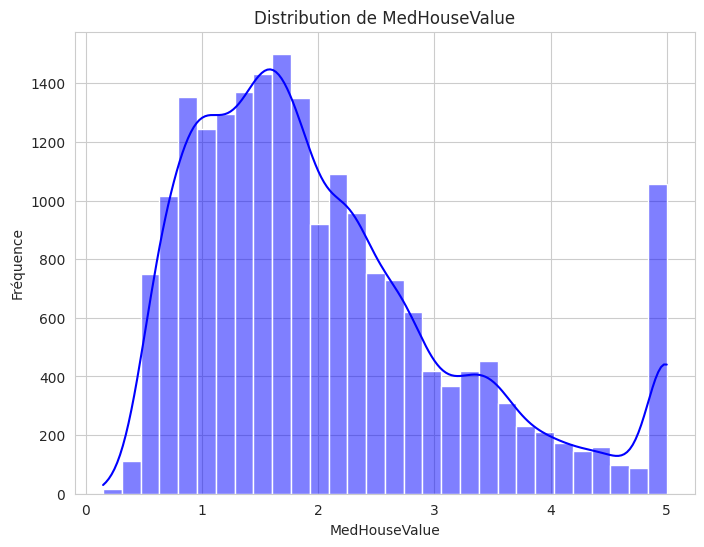

In [19]:
# Distribution de la variable cible MedHouseValue
plt.figure(figsize=(8,6))
sns.histplot(data['MedHouseValue'], bins=30, kde=True, color='blue')
plt.title('Distribution de MedHouseValue')
plt.xlabel('MedHouseValue')
plt.ylabel('Fréquence')
plt.show()

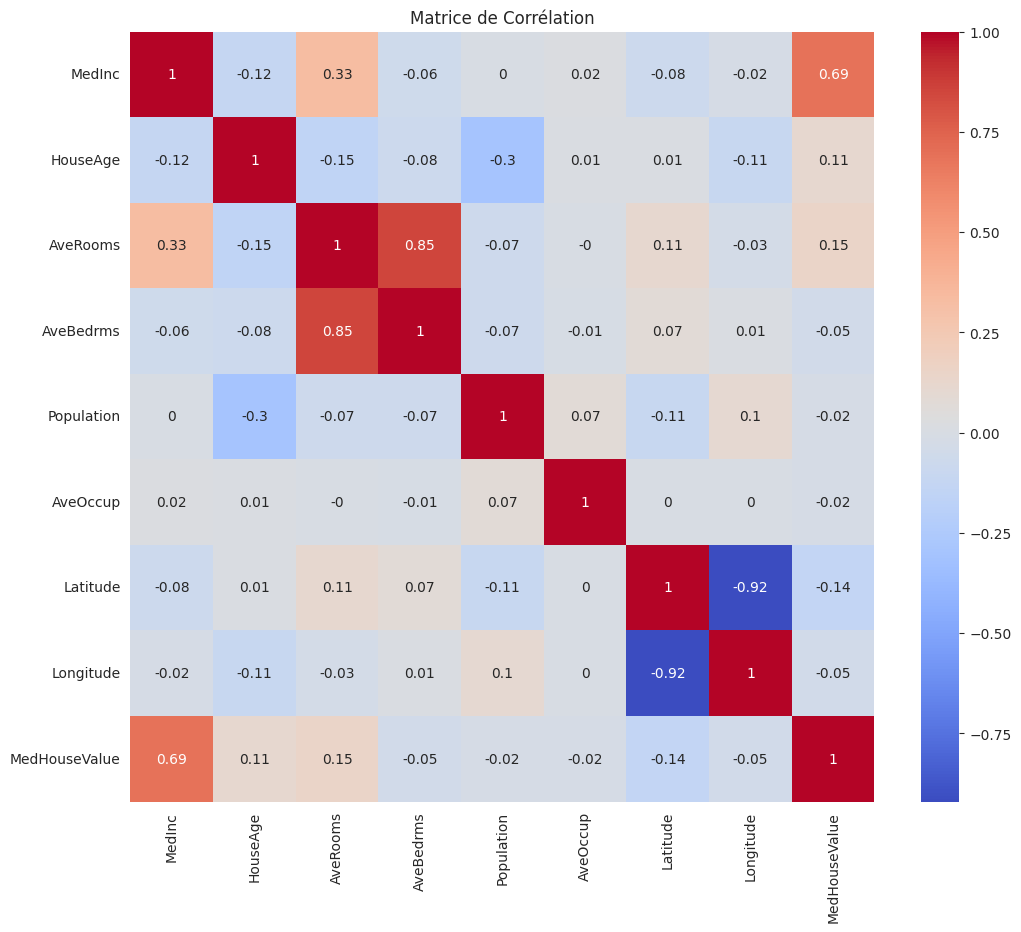

In [20]:
# Matrice de corrélation
plt.figure(figsize=(12,10))
corr_matrix = data.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# 🧹 Prétraitement des Données

Nous allons :

- Séparer les variables indépendantes et dépendante.
- Diviser les données en ensembles d'entraînement et de test.
- Standardiser les variables (important pour les méthodes de régularisation).

---


In [21]:
# Séparation des variables
X = data.drop('MedHouseValue', axis=1)
y = data['MedHouseValue']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📐 Régression Polynomiale

La régression polynomiale permet de modéliser des relations non linéaires en ajoutant des puissances des variables indépendantes.

Nous allons :

- Créer des features polynomiales.
- Entraîner un modèle de régression linéaire sur ces nouvelles features.
- Évaluer le modèle.

---


In [23]:
# Création des features polynomiales (degré 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

print(f"Nombre de features originales : {X_train.shape[1]}")
print(f"Nombre de features après transformation polynomiale : {X_train_poly.shape[1]}")

Nombre de features originales : 8
Nombre de features après transformation polynomiale : 44


In [24]:
# Entraînement du modèle de régression linéaire sur les features polynomiales
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Prédictions
y_pred_poly = model_poly.predict(X_test_poly)

# Évaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MSE du modèle polynomial : {mse_poly:.2f}")
print(f"R² du modèle polynomial : {r2_poly:.2f}")

MSE du modèle polynomial : 0.46
R² du modèle polynomial : 0.65


**Interprétation :** La régression polynomiale a augmenté le nombre de features, ce qui peut améliorer la capacité du modèle à capturer des relations non linéaires. Cependant, cela peut également conduire à un surapprentissage si le modèle devient trop complexe.

---


# ⚖️ Ridge Regression (Régression L2)

La Ridge Regression ajoute une pénalité L2 à la fonction de coût pour réduire la magnitude des coefficients, ce qui peut aider à gérer la multicolinéarité et à prévenir le surapprentissage.

Nous allons :

- Entraîner un modèle Ridge sur les données polynomiales.
- Trouver le meilleur paramètre alpha (force de régularisation) en utilisant la validation croisée.
- Évaluer le modèle.

---


In [25]:
# Recherche du meilleur alpha pour Ridge Regression
ridge = Ridge()
params = {'alpha': np.logspace(-3, 3, 7)}

ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train_poly, y_train)

print(f"Meilleur alpha pour Ridge : {ridge_cv.best_params_['alpha']}")

Meilleur alpha pour Ridge : 100.0


In [26]:
# Entraînement du modèle Ridge avec le meilleur alpha
best_alpha = ridge_cv.best_params_['alpha']
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train_poly, y_train)

# Prédictions
y_pred_ridge = model_ridge.predict(X_test_poly)

# Évaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE du modèle Ridge : {mse_ridge:.2f}")
print(f"R² du modèle Ridge : {r2_ridge:.2f}")

MSE du modèle Ridge : 0.45
R² du modèle Ridge : 0.66


# ⚖️ Lasso Regression (Régression L1)

La Lasso Regression ajoute une pénalité L1, ce qui peut conduire à la réduction de certains coefficients à zéro, effectuant ainsi une sélection automatique des variables.

Nous allons :

- Entraîner un modèle Lasso sur les données polynomiales.
- Trouver le meilleur paramètre alpha en utilisant la validation croisée.
- Évaluer le modèle.
- Analyser les coefficients pour voir quelles variables ont été sélectionnées.

---


In [27]:
# Recherche du meilleur alpha pour Lasso Regression
lasso = Lasso(max_iter=50000)
params = {'alpha': np.logspace(-2, 1, 5)}  # Augmenté alpha et max_iter

lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train_poly, y_train)

print(f"Meilleur alpha pour Lasso : {lasso_cv.best_params_['alpha']}")


Meilleur alpha pour Lasso : 0.05623413251903491


In [28]:
# Entraînement du modèle Lasso avec le meilleur alpha
best_alpha_lasso = lasso_cv.best_params_['alpha']
model_lasso = Lasso(alpha=best_alpha_lasso, max_iter=50000)
model_lasso.fit(X_train_poly, y_train)

# Prédictions
y_pred_lasso = model_lasso.predict(X_test_poly)

# Évaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE du modèle Lasso : {mse_lasso:.2f}")
print(f"R² du modèle Lasso : {r2_lasso:.2f}")

MSE du modèle Lasso : 0.63
R² du modèle Lasso : 0.52


In [29]:
# Nombre de coefficients non nuls
coeffs_lasso = model_lasso.coef_
print(f"Nombre de coefficients non nuls : {np.sum(coeffs_lasso != 0)} sur {len(coeffs_lasso)}")

Nombre de coefficients non nuls : 9 sur 44


**Interprétation :** La Lasso Regression a éliminé certaines variables en réduisant leurs coefficients à zéro, ce qui simplifie le modèle et peut améliorer sa généralisation.

---


# ⚖️ Elastic Net Regression

L'Elastic Net combine les pénalités L1 et L2, bénéficiant ainsi des avantages de la Ridge et de la Lasso Regression.

Nous allons :

- Entraîner un modèle Elastic Net sur les données polynomiales.
- Trouver les meilleurs paramètres alpha et l1_ratio en utilisant la validation croisée.
- Évaluer le modèle.

---


In [30]:
# Recherche des meilleurs paramètres pour Elastic Net
elastic_net = ElasticNet(max_iter=50000)
params = {
    'alpha': np.logspace(-2, 1, 5),  # Augmenté alpha
    'l1_ratio': [0.2, 0.5, 0.8]
}

elastic_cv = GridSearchCV(elastic_net, params, cv=5)
elastic_cv.fit(X_train_poly, y_train)

print(f"Meilleurs paramètres pour Elastic Net : {elastic_cv.best_params_}")

Meilleurs paramètres pour Elastic Net : {'alpha': 0.05623413251903491, 'l1_ratio': 0.2}


In [31]:
# Entraînement du modèle Elastic Net avec les meilleurs paramètres
best_alpha_elastic = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']
model_elastic = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio, max_iter=50000)
model_elastic.fit(X_train_poly, y_train)

# Prédictions
y_pred_elastic = model_elastic.predict(X_test_poly)

# Évaluation
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"MSE du modèle Elastic Net : {mse_elastic:.2f}")
print(f"R² du modèle Elastic Net : {r2_elastic:.2f}")

MSE du modèle Elastic Net : 0.58
R² du modèle Elastic Net : 0.56


# 📊 Comparaison des Modèles

Nous allons comparer les performances des différents modèles que nous avons entraînés.

---


In [32]:
# Compilation des résultats
results = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Ridge Regression', 'Lasso Regression', 'Elastic Net'],
    'MSE': [mse_poly, mse_ridge, mse_lasso, mse_elastic],
    'R²': [r2_poly, r2_ridge, r2_lasso, r2_elastic]
})

results

,Modèle,MSE,R²
0,Régression Linéaire,0.464302,0.645682
1,Ridge Regression,0.447404,0.658576
2,Lasso Regression,0.633311,0.516707
3,Elastic Net,0.575072,0.561151


**Interprétation :** En comparant les MSE et les R², nous pouvons évaluer quel modèle offre les meilleures performances sur les données de test. Les méthodes de régularisation peuvent améliorer la généralisation du modèle en évitant le surapprentissage.

---


# 📌 Conclusion

Dans ce notebook, nous avons :

- **Exploré** des techniques de régression avancées pour améliorer nos modèles.
- **Implémenté** la régression polynomiale pour capturer des relations non linéaires.
- **Utilisé** des méthodes de régularisation (Ridge, Lasso, Elastic Net) pour gérer la multicolinéarité et éviter le surapprentissage.
- **Évalué** et **comparé** les performances des différents modèles.

Ces techniques sont essentielles pour construire des modèles robustes et performants, surtout lorsque nous travaillons avec des jeux de données complexes.

**Auteur :** Omar Kennouche, fondateur de **AI Nexus One**

---

*Merci d'avoir suivi ce notebook ! N'hésitez pas à expérimenter davantage avec ces techniques et à les appliquer à vos propres données.*


# 📝 Exercices Supplémentaires

1. **Tester différents degrés polynomiaux** : Essayez des degrés supérieurs ou inférieurs et observez l'impact sur les performances du modèle.

2. **Utiliser un autre jeu de données** : Appliquez ces techniques sur un autre jeu de données pour voir comment elles se généralisent.

3. **Explorer d'autres méthodes de régularisation** : Par exemple, la **Régression PLS** (Partial Least Squares) ou la **Régression PCR** (Principal Component Regression).

---


# 📚 Ressources Supplémentaires

- 📘 [Documentation Scikit-Learn - Régression Linéaire et Régularisation](https://scikit-learn.org/stable/modules/linear_model.html)
- 🎓 [Cours sur la Régression Polynomiale et la Régularisation - StatQuest (Vidéo)](https://www.youtube.com/watch?v=Q81RR3yKn30)
- 📖 [Livre : "An Introduction to Statistical Learning"](https://www.statlearning.com/)

---
